<h1 style="text-align: center; background-color: #f4a261; border-radius: 5px; padding: 7px 5px 7px 5px; margin: 0px;">RIO 125 : FORECASTING SALES OF RETAIL OUTLET</h1>

***
<h3 style="text-align: center; background-color: #e07a5f; border-radius: 5px; padding: 7px 5px 7px 5px; margin: 0px;">PROJECT OVERVIEW</h3>

<br>

This document encapsulates a comprehensive exploration into the development of a time series model, centered around the **Favorita Sales Dataset**. The data is collected from the sales of an **Ecuadorian Retail Chain** and is a combined collection of sales data for multiple different stores. A detailed overview is provided later in the document.

<h4 style="color: #ef233c; font-weight:700;"> DATA SOURCE:</h4>

The raw data is available on Kaggle in the form of csv files. The files can be found [**here**](https://www.kaggle.com/competitions/store-sales-time-series-forecasting/data).<br>
The dataset contains about 3 Million entries as it captures the day-wise sales of family of products in different stores.
***

In [1]:
import os
os.listdir("Favorita_Stores_Sales_Dataset/")

['main.csv', 'oil.csv', 'stores.csv']

***
<h4 style="color: #ef233c; font-weight:700;"> DATA DESCRIPTION:</h4>

The dataset contains multiple csv files which contain different data regarding the sales, various factors influencing the sales and data about holidays in Ecuador. The below content explains the data (csv files):

<strong style="color:#ef233c; font-size:17px;">1. main.csv</strong>

Comprises of time series of feature **`store_nbr`**, **`family`**, and **`onpromotion`** as well as the target **`sales`**

1. **`store_nbr`** identifies the store at which the products are sold.
2. **`family`** identifies the type of product sold.
3. **`sales`** gives the total sales for a product family at a particular store at a given date. Fractional values are possible since products can be sold in fractional units (1.t kg of cheese, for instance, as opposed to 1 bag of chips).
4. **`onpromotion`** gives the total number of items in a product family that were being promoted at a store at a given date.

<strong style="color:#ef233c; font-size:17px;"> 2. oil.csv</strong>

***Daily oil price***. Includes values during the time of collected entries. (Ecuador is an oil-dependent country and its economical health is highly vulnerable to shocks in oil prices).

<strong style="color:#ef233c; font-size:17px;"> 3. stores.csv</strong>

Metadata of different stores in the dataset, including city, state, type and cluster. Cluster is a grouping of similar stores.
***

In [54]:
# Importing the requried libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Setting to ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Importing all different datasets
main_df = pd.read_csv("Favorita_Stores_Sales_Dataset/main.csv")

oil_df= pd.read_csv("Favorita_Stores_Sales_Dataset/oil.csv")

stores_df = pd.read_csv("Favorita_Stores_Sales_Dataset/stores.csv")

In [4]:
main_df.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [5]:
oil_df.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [6]:
stores_df.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [7]:
# Renaming column names 
oil_df.rename(columns = {"dcoilwtico":"oil_price"}, inplace = True)

oil_df.head()

,date,oil_price
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [8]:
print("Shape of Main DF:", main_df.shape)

print("Shape of Oil DF:", oil_df.shape)

print("Shape of Stores DF:",stores_df.shape)

Shape of Main DF: (3000888, 6)
Shape of Oil DF: (1218, 2)
Shape of Stores DF: (54, 5)


***
For a summarized view of the dataset, we need to merge all these three different dataframes into one single dataframe. This will help in easy and smooth analysis and EDA.

First merging the **`main_df`** and **`oil_df`** dataframes.
***

In [12]:
# Merging oil prices df with main df
main_df = main_df.merge(oil_df, on='date', how='left')
main_df.head()

,id,date,store_nbr,family,sales,onpromotion,oil_price
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,NaN
1,1,2013-01-01,1,BABY CARE,0.0,0,NaN
2,2,2013-01-01,1,BEAUTY,0.0,0,NaN
3,3,2013-01-01,1,BEVERAGES,0.0,0,NaN
4,4,2013-01-01,1,BOOKS,0.0,0,NaN


***
There are a lot of null values right now but we can deal with it later on during data cleaning.

The next step is to merge **`stores_df`** with **`main_df`**.
***

In [13]:
main_df = main_df.merge(stores_df, on='store_nbr', how='left')
main_df.head()

,id,date,store_nbr,family,sales,onpromotion,oil_price,city,state,type,cluster
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,NaN,Quito,Pichincha,D,13
1,1,2013-01-01,1,BABY CARE,0.0,0,NaN,Quito,Pichincha,D,13
2,2,2013-01-01,1,BEAUTY,0.0,0,NaN,Quito,Pichincha,D,13
3,3,2013-01-01,1,BEVERAGES,0.0,0,NaN,Quito,Pichincha,D,13
4,4,2013-01-01,1,BOOKS,0.0,0,NaN,Quito,Pichincha,D,13


In [14]:
main_df.info(show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 11 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   id           3000888 non-null  int64  
 1   date         3000888 non-null  object 
 2   store_nbr    3000888 non-null  int64  
 3   family       3000888 non-null  object 
 4   sales        3000888 non-null  float64
 5   onpromotion  3000888 non-null  int64  
 6   oil_price    2072466 non-null  float64
 7   city         3000888 non-null  object 
 8   state        3000888 non-null  object 
 9   type         3000888 non-null  object 
 10  cluster      3000888 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 251.8+ MB


In [15]:
# Creating a copy of the main df for further analysis
df = main_df.copy()

In [16]:
df.head()

,id,date,store_nbr,family,sales,onpromotion,oil_price,city,state,type,cluster
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,NaN,Quito,Pichincha,D,13
1,1,2013-01-01,1,BABY CARE,0.0,0,NaN,Quito,Pichincha,D,13
2,2,2013-01-01,1,BEAUTY,0.0,0,NaN,Quito,Pichincha,D,13
3,3,2013-01-01,1,BEVERAGES,0.0,0,NaN,Quito,Pichincha,D,13
4,4,2013-01-01,1,BOOKS,0.0,0,NaN,Quito,Pichincha,D,13


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 11 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
 6   oil_price    float64
 7   city         object 
 8   state        object 
 9   type         object 
 10  cluster      int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 251.8+ MB


***
The captured data in the dataset is recorded on a day-wise basis. We need monthly sales as per project requirements. To further manipulate the data based on dates, we need to convert **`date`** column to an actual ***datetime*** format.
***

In [18]:
# Converting the date column into proper dates
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 11 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           int64         
 1   date         datetime64[ns]
 2   store_nbr    int64         
 3   family       object        
 4   sales        float64       
 5   onpromotion  int64         
 6   oil_price    float64       
 7   city         object        
 8   state        object        
 9   type         object        
 10  cluster      int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(4)
memory usage: 251.8+ MB


In [19]:
date_group = df.groupby("date").sum(numeric_only=True)

In [20]:
date_group.head()

,id,store_nbr,sales,onpromotion,oil_price,cluster
date,,,,,,
2013-01-01,1586871,49005,2511.618999,0,0.00,15114
2013-01-02,4762395,49005,496092.417944,0,165975.48,15114
2013-01-03,7937919,49005,361461.231124,0,165672.54,15114
2013-01-04,11113443,49005,354459.677093,0,165939.84,15114
2013-01-05,14288967,49005,477350.121229,0,0.00,15114


***
<center><h3>Checking the sales over time</h3></center>

***

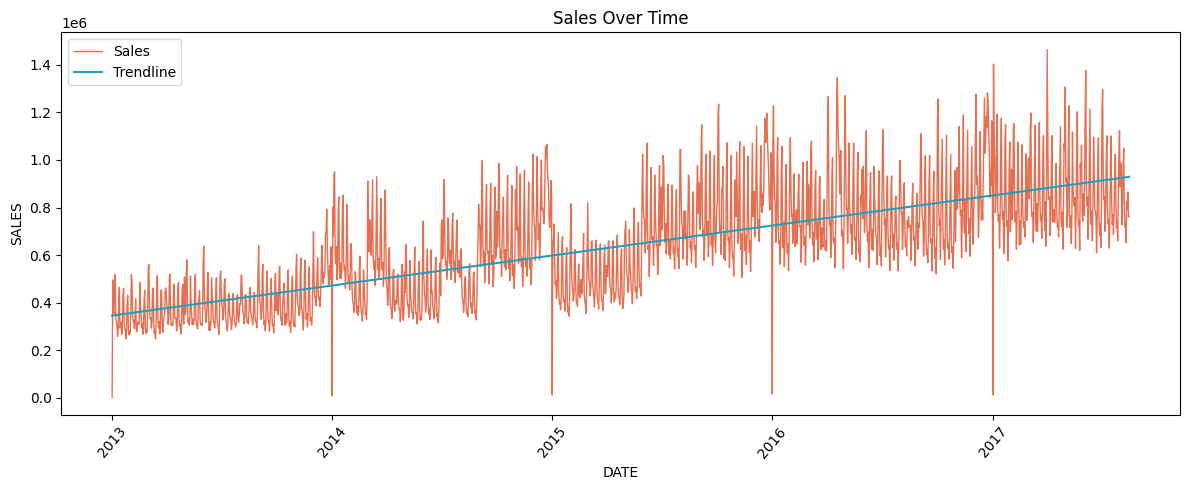

In [83]:
plt.figure(figsize=(12,5))

# Plotting sales data
plt.plot(date_group.index, date_group["sales"], 
         label = "Sales", 
         color = "#e76f51", 
         linewidth = 1)

# Adding a trendline 
x = np.arange(len(date_group.index))  
y = date_group["sales"].values  

coefficients = np.polyfit(x, y, 1)
trendline = np.polyval(coefficients, x)

# Plotting the trendline
plt.plot(date_group.index, trendline, 
         label="Trendline", 
         color="#219ebc")

plt.title("Sales Over Time")
plt.xlabel("DATE")
plt.ylabel("SALES")
plt.xticks(rotation=50)
plt.legend()  
plt.tight_layout()
plt.show()

The sales has gradually increased over time with some seasonal variations.

***
<center><h3>The Number of Stores in each state</h3></center>

***

Text(0.5, 0, 'Count')

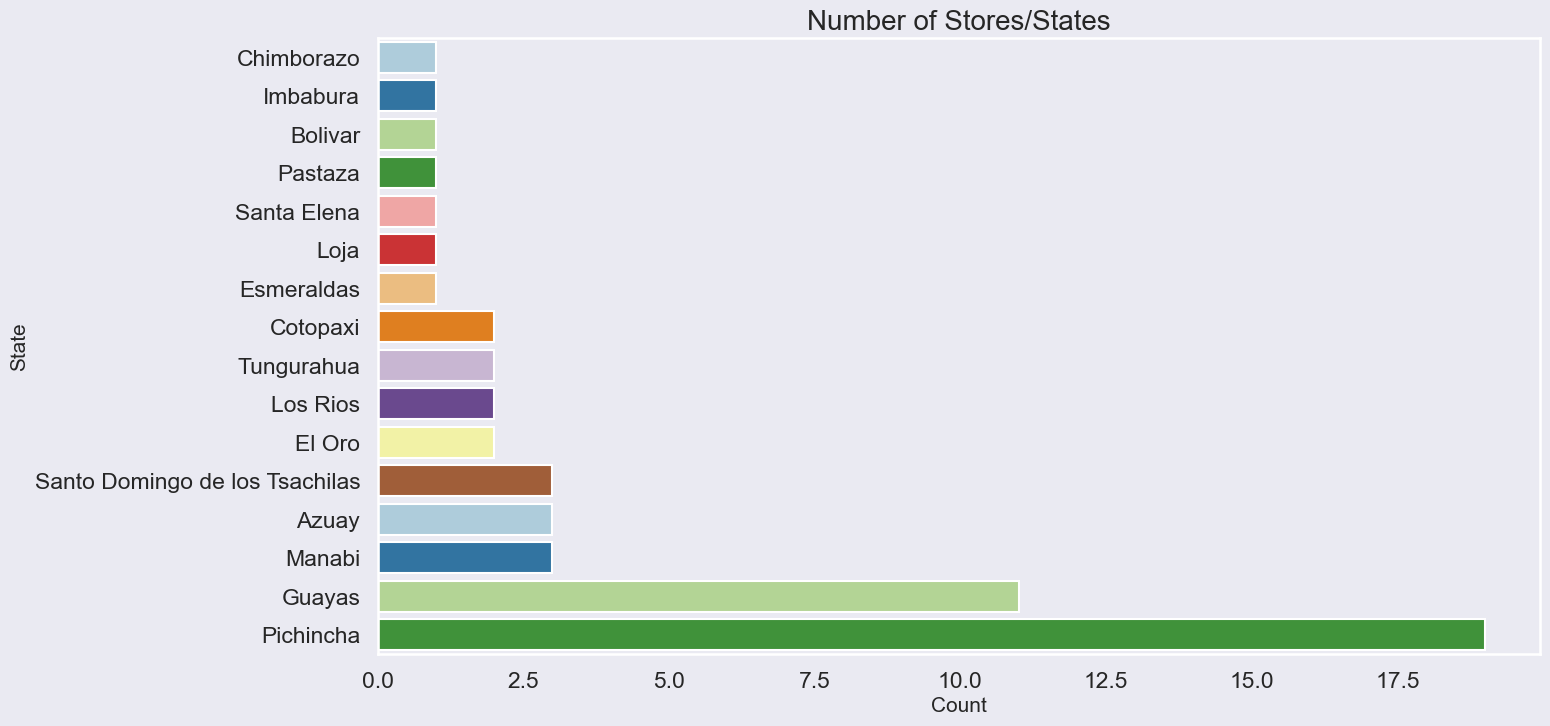

In [109]:
# Visualization of Store State
sns.set_style("dark")
fig = plt.figure(figsize = (15, 8))
fig.set_facecolor("#eaeaf2")

sns.countplot(data = stores_df, y = 'state',
              order = stores_df.state.value_counts(ascending=True).index, 
              palette = 'Paired')

plt.title('Number of Stores/States', fontsize = 20)
plt.ylabel('State', fontsize = 15)
plt.xlabel('Count', fontsize = 15)

***
<center><h3>Total Sales made by Different Stores</h3></center>

***

Text(0.5, 1.0, 'Total Sales by Stores')

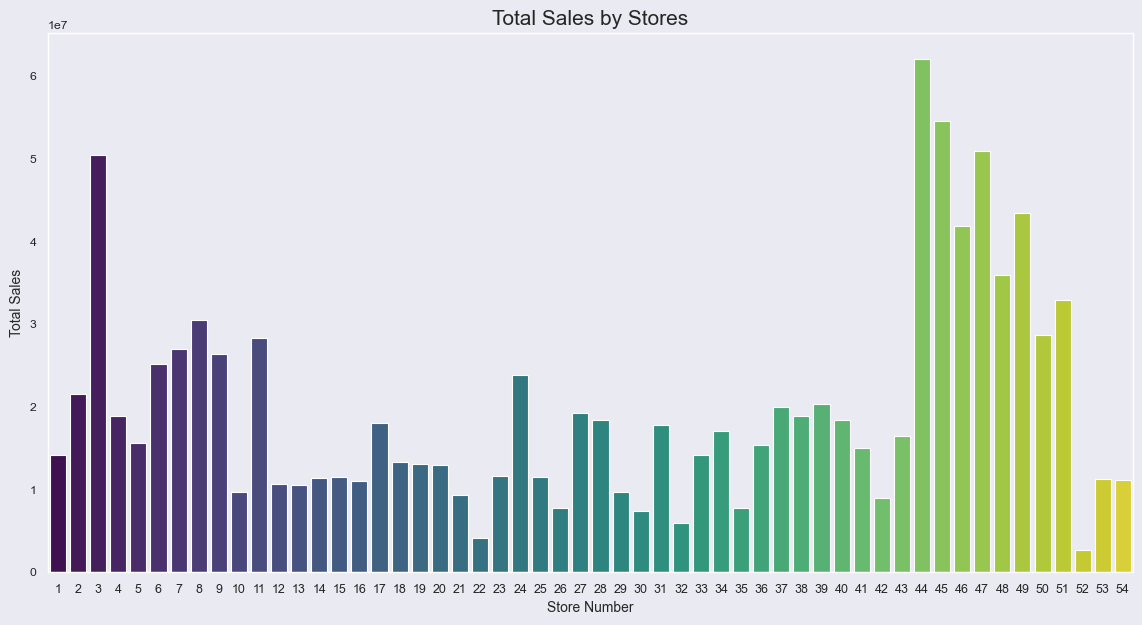

In [128]:
grouped_sales_by_store_num=df.groupby('store_nbr').sum('sales').reset_index()

# Dropping the unnecessary columns
grouped_sales_by_store_num.drop(['id','onpromotion','oil_price','cluster'], 
                                axis=1, inplace = True)

# Plotting the bar chart 
sns.set_style("dark")
fig = plt.figure(figsize = (14,7))
fig.set_facecolor("#eaeaf2")

sns.barplot(x = 'store_nbr', y = 'sales', 
            data = grouped_sales_by_store_num, 
            palette = 'viridis')
plt.xlabel("Store Number", fontsize = '10')
plt.ylabel("Total Sales", fontsize = '10')
plt.xticks(fontsize = 9)
plt.title('Total Sales by Stores', fontsize = '15')

***
<center><h3>Product Family vs Sales</h3></center>

***

Text(0.5, 1.0, 'Total Sales by Product Family')

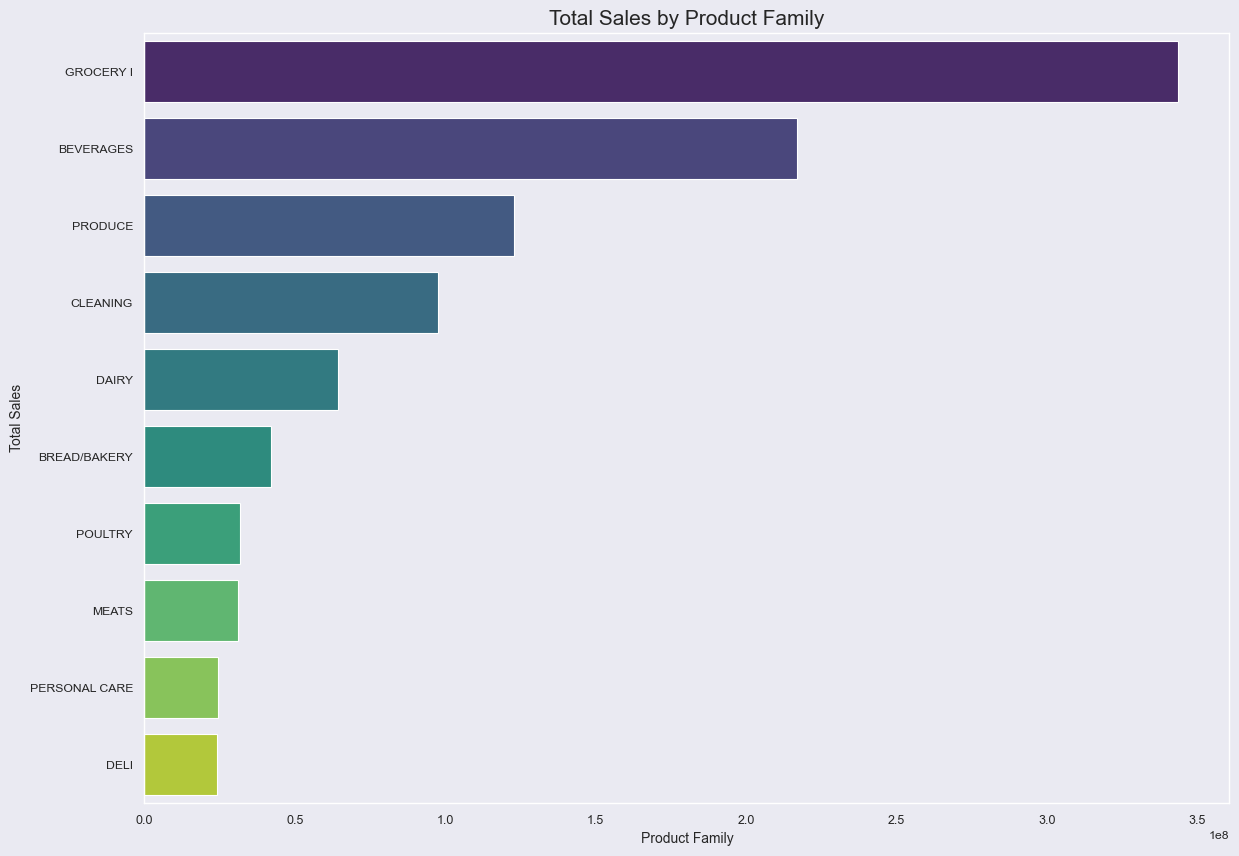

In [143]:
grouped_sales_by_family = df.groupby('family').sum(numeric_only = True)
grouped_sales_by_family.drop(['id', 'store_nbr', 'onpromotion', 'oil_price', 'cluster'], 
                             axis = 1, inplace = True)

# Plotting the bar chart 
sns.set_style("dark")
fig = plt.figure(figsize = (14,10))
fig.set_facecolor("#eaeaf2")

grouped_sales_by_family.sort_values(by='sales', 
                                    ascending=False, 
                                    inplace = True)

sns.barplot(x = grouped_sales_by_family.sales[:10], 
            y = grouped_sales_by_family.index[:10], 
            palette = 'viridis')

plt.xlabel("Product Family", fontsize = '10')
plt.ylabel("Total Sales", fontsize = '10')
plt.xticks(fontsize = 9)
plt.title('Total Sales by Product Family', fontsize = '15')

**`Grocery`** Products generate the highest sales followed by **`Beverages`** and **`Produce`**

Product Families on the lower end, like **`Book`**, **`Baby Care`** do not generate enough sales.

***
<center><h3>Distribution of Sales Column</h3></center>

***

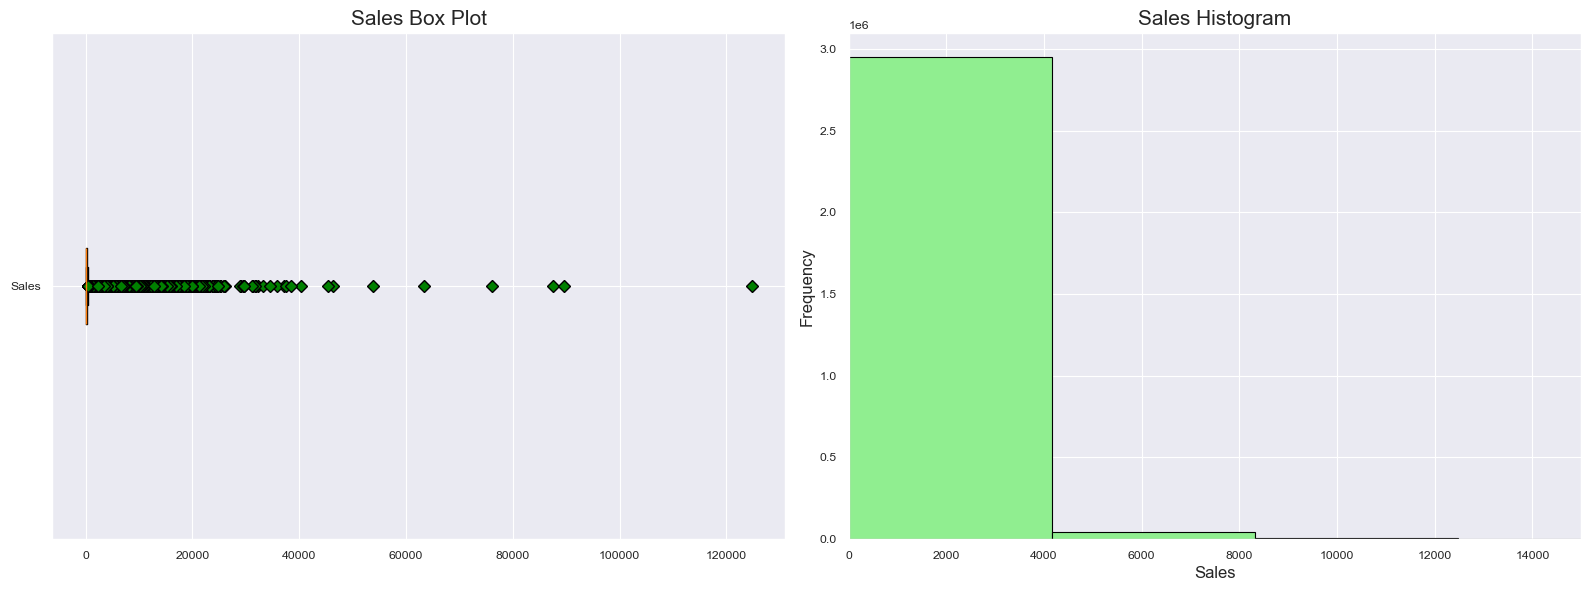

In [170]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Plotting the histogram
axes[1].hist(df['sales'], bins=30, color='lightgreen', edgecolor='black')
axes[1].set_title('Sales Histogram', fontsize=15)
axes[1].set_xlabel('Sales', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].grid(True)
axes[1].set_xlim(0, 15000)

# Plotting the box plot
axes[0].boxplot(df['sales'], vert = False, flierprops = dict(markerfacecolor='g', marker='D'))
axes[0].set_title('Sales Box Plot', fontsize=15)
axes[0].set_yticklabels(['Sales'])
axes[0].grid(True)

plt.tight_layout() 
plt.show()

The distribution of sales is right-skewed (positively skewed). Box plot indicates presence of extreme values in the dataset.
***